### Deliverable 3: Optimize the Model
----

This is just one possible solution to get the accuracy above 75%. 

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(["EIN"],1)

In [4]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at NAME value counts for binning
name_counts = application_df.NAME.value_counts()
#  How many name counts are greater than 5?
name_counts[name_counts>5]

PARENT BOOSTER USA INC                                1260
TOPS CLUB INC                                          765
UNITED STATES BOWLING CONGRESS INC                     700
WASHINGTON STATE UNIVERSITY                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC        408
                                                      ... 
DAMAGE PREVENTION COUNCIL OF TEXAS                       6
AMERICAN INDEPENDENT BUSINESS ALLIANCE                   6
BETA BETA BETA BIOLOGICAL SOCIETY                        6
AMERICAN SOCIETY OF ADDICTION MEDICINE INC               6
FAMILY CAREER AND COMMUNITY LEADERS OF AMERICA INC       6
Name: NAME, Length: 354, dtype: int64

In [6]:
#  How many name counts are less than or equal to 5?
name_counts[name_counts <= 5]

COUNTRY DANCE & SONG SOCIETY INC                                  5
VETERANS OF FOREIGN WARS OF THE UNITED STATES DEPT OF COLORADO    5
NATIONAL ORGANIZATION FOR WOMEN INC                               5
TEAMSTER HORSEMEN MOTORCYCLE ASSOCIATION INC                      5
AMERICAN-TURKISH ASSOCIATION OF SOUTHERN CALIFORNIA               5
                                                                 ..
BLACK ROCK ELEMENTARY PTO INC                                     1
CONGRESSIONAL AWARD FOUNDATION                                    1
FRANKLIN S ALLEN TRUST                                            1
CREATIVE ENVIRONMENTAL MENTORING ACCESSING BOUNDLESS ARTS         1
GIRLS ON THE RUN TN-6-332                                         1
Name: NAME, Length: 19214, dtype: int64

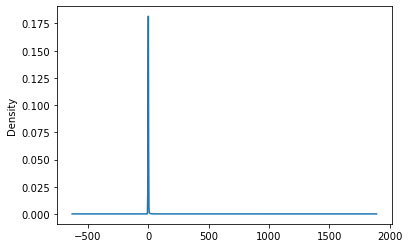

In [7]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than or equal to 5.
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                 20043
PARENT BOOSTER USA INC                                 1260
TOPS CLUB INC                                           765
UNITED STATES BOWLING CONGRESS INC                      700
WASHINGTON STATE UNIVERSITY                             492
                                                      ...  
REFRIGERATION SERVICE ENGINEERS SOCIETY                   6
FAMILY CAREER AND COMMUNITY LEADERS OF AMERICA INC        6
KIWANIS INTERNATIONAL                                     6
THE INTERIOR DESIGN SOCIETY INC                           6
FLEET RESERVE ASSOCIATION                                 6
Name: NAME, Length: 355, dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1580        1
C4120        1
C1248        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# Determine which values to replace if counts are less than 1000
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               39900     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 43,251
Trainable params: 43,251
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("challenge_checkpoints/",exist_ok=True)
checkpoint_path = "challenge_checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=1000)

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 135us/sample - loss: 0.4929 - accuracy: 0.7757
Epoch 2/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.4423 - accuracy: 0.7932
Epoch 3/100
25724/25724 [==============================] - 2s 91us/sample - loss: 0.4347 - accuracy: 0.7952
Epoch 4/100
25724/25724 [==============================] - 2s 91us/sample - loss: 0.4297 - accuracy: 0.7970
Epoch 5/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.4279 - accuracy: 0.7984
Epoch 6/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.4257 - accuracy: 0.7979
Epoch 7/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4239 - accuracy: 0.7972
Epoch 8/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.4228 - accuracy: 0.7988
Epoch 9/100
25724/25724 [==============================] - 3s 100us/sample - loss: 0.4215 - accuracy: 0.7998
Epo

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.3629 - accuracy: 0.7902
Loss: 0.44498521643894406, Accuracy: 0.7902041077613831


In [24]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

#### Data Preprocessing
----
1. What variable(s) are considered the target for your model?
ANSWER: The target for the model is the "Is-Successful" column. It signifies if the money was use effectively.
---
2. What variable(s) are considered to be the features for your model?
ANSWER: The features of this model are the NAME, APPLICATION, TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, INCOME_AMT,SPECIAL_CONSIDERATIONS, STATUS, and ASK_AMT
---
3. What variable(s) are neither and should be removed from the input data? 
ANSWER:  EIN (Employer identificaiton) was dropped because the numbers could confuse the system into thinking its significant.
ANSWER: A student could drop SPECIAL_CONSIDERATIONS because there is only a small percentage of cases that had any special consideration, and special considerations cannot be quantified.
ANSWER: A student could drop STATUS because  all rows were the same value, 1.


#### Compiling, Training, and Evaluating the Model
---- 
1. How many neurons, layers, and and activation functions did you select for your neural network model, and why?
ANSWER: In this model there are three hidden layers each with many neurons,  because this seeemed to increased the accuracy above 75%. The number of epochs wasn't changed. The first activation function was 'relu' but the 2nd and 3rd were 'sigmoid'and the output function was 'sigmoid'. Changing the 2nd and 3rd activation functions to 'sigmoid' also helped boost the accuracy. 
---
2. Were you able to achieve the target model performance?
ANSWER: Yes 
---
3. What steps did you take to try and increase model performance?
ANSWER: It required converting the NAME column into data points, which has the biggest impact on improving efficiency. And, it also required adding a third layer and using the "sigmoid" activation function for the 2nd and 3rd layer.

#### Summary
----
Overall, by increasing the accuracy above 75% we are able to correctly classify each of the points in the test data 75% of the time. And, an applicant has a 80% chance of being successful if they have the following:
- The NAME of the applicant appears more than 5 times (they have applied more than 5 times)
- The type of APPLICATION is one of the following; T3, T4, T5, T6, T7, T8, T10, and T19
- The application has the following CLASSIFICATION; C1000, C2000, C3000, C1200, and C2100.

A good model to recommend is the Random Forest model because Random Forest are good for classification problems. Using this model produces a 78% accuracy. 

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest model accuracy: 0.776
